# Let's try some DS on Thanksgiving data!!

Using a SurveyMonkey poll, we asked 1,058 respondents on Nov. 17, 2015 the following questions about their Thanksgiving:

* Do you celebrate Thanksgiving?
* What is typically the main dish at your Thanksgiving dinner?
    * Other (please specify)
* How is the main dish typically cooked?
    * Other (please specify)
* What kind of stuffing/dressing do you typically have?
    * Other (please specify)
* What type of cranberry sauce do you typically have? 
    * Other (please specify)
* Do you typically have gravy?
* Which of these side dishes are typically served at your Thanksgiving dinner? Please select all that apply.
    * Brussel sprouts
    * Carrots
    * Cauliflower
    * Corn
    * Cornbread
    * Fruit salad
    * Green beans/green bean casserole
    * Macaroni and cheese
    * Mashed potatoes
    * Rolls/biscuits
    * Vegetable salad
    * Yams/sweet potato casserole
    * Other (please specify)
* Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. 
    * Apple
    * Buttermilk
    * Cherry
    * Chocolate
    * Coconut cream
    * Key lime
    * Peach
    * Pecan
    * Pumpkin
    * Sweet Potato
    * None 
    * Other (please specify)
* Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply.
    * Apple cobbler
    * Blondies
    * Brownies
    * Carrot cake
    * Cheesecake
    * Cookies
    * Fudge
    * Ice cream
    * Peach cobbler
    * None
    * Other (please specify)
* Do you typically pray before or after the Thanksgiving meal?
* How far will you travel for Thanksgiving?
* Will you watch any of the following programs on Thanksgiving? Please select all that apply. 
    * Macy's Parade
* What's the age cutoff at your "kids' table" at Thanksgiving?
* Have you ever tried to meet up with hometown friends on Thanksgiving night?
* Have you ever attended a "Friendsgiving?"
* Will you shop any Black Friday sales on Thanksgiving Day?
* Do you work in retail?
* Will you employer make you work on Black Friday?
* How would you describe where you live? 
* Age
* What is your gender?
* How much total combined money did all members of your HOUSEHOLD earn last year?
* US Region

Download data here: https://github.com/opencubelabs/notebooks/blob/master/data_science/data/thanksgiving.csv

In [33]:
import pandas as pd

data = pd.read_csv("data/thanksgiving.csv", encoding="Latin-1")
data.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Have you ever tried to meet up with hometown friends on Thanksgiving night?,"Have you ever attended a ""Friendsgiving?""",Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,4337954960,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,None,NaN,...,Yes,No,No,No,NaN,Suburban,18 - 29,Male,"$75,000 to $99,999",Middle Atlantic
1,4337951949,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Other (please specify),Homemade cranberry gelatin ring,...,No,No,Yes,No,NaN,Rural,18 - 29,Female,"$50,000 to $74,999",East South Central
2,4337935621,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,No,NaN,Suburban,18 - 29,Male,"$0 to $9,999",Mountain
3,4337933040,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Homemade,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$200,000 and up",Pacific
4,4337931983,Yes,Tofurkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$100,000 to $124,999",Pacific


In [34]:
data["Do you celebrate Thanksgiving?"].unique()

array([u'Yes', u'No'], dtype=object)

In [35]:
data.columns[59:]

Index([u'Will you employer make you work on Black Friday?',
       u'How would you describe where you live?', u'Age',
       u'What is your gender?',
       u'How much total combined money did all members of your HOUSEHOLD earn last year?',
       u'US Region'],
      dtype='object')

Using this Thanksgiving survey data, we can answer quite a few interesting questions, like:

* Do people in Suburban areas eat more Tofurkey than people in Rural areas?
* Where do people go to Black Friday sales most often?
* Is there a correlation between praying on Thanksgiving and income?
* What income groups are most likely to have homemade cranberry sauce?

Let's get familier with applying, grouping and aggregation in Pandas

### Applying functions to Series in pandas

There are times when we're using pandas that we want to apply a function to every row or every column in the data. A good example is getting from the values in our What is your gender? column to numeric values. We'll assign 0 to Male, and 1 to Female.

**pandas.Series.apply**

In [36]:
data["What is your gender?"].value_counts(dropna=False)

Female    544
Male      481
NaN        33
Name: What is your gender?, dtype: int64

In [37]:
import math

def gender_code(gender_string):
    if isinstance(gender_string, float) and math.isnan(gender_string):
        return gender_string
    return int(gender_string == "Female")

In [38]:
data["gender"] = data["What is your gender?"].apply(gender_code)
data["gender"].value_counts(dropna=False)

 1.0    544
 0.0    481
NaN      33
Name: gender, dtype: int64

### Applying functions to DataFrames in pandas

We can use the apply method on DataFrames as well as Series. When we use the **pandas.DataFrame.apply** method, an entire row or column will be passed into the function we specify. By default, apply will work across each column in the DataFrame. If we pass the axis=1 keyword argument, it will work across each row.

In [39]:
data.apply(lambda x: x.dtype).head() # find data type of each column

RespondentID                                                                             object
Do you celebrate Thanksgiving?                                                           object
What is typically the main dish at your Thanksgiving dinner?                             object
What is typically the main dish at your Thanksgiving dinner? - Other (please specify)    object
How is the main dish typically cooked?                                                   object
dtype: object

In [40]:
# Let's clean up the income using apply method

data["How much total combined money did all members of your HOUSEHOLD earn last year?"].value_counts(dropna=False)

$25,000 to $49,999      180
Prefer not to answer    136
$50,000 to $74,999      135
$75,000 to $99,999      133
$100,000 to $124,999    111
$200,000 and up          80
$10,000 to $24,999       68
$0 to $9,999             66
$125,000 to $149,999     49
$150,000 to $174,999     40
NaN                      33
$175,000 to $199,999     27
Name: How much total combined money did all members of your HOUSEHOLD earn last year?, dtype: int64

We have 4 different patterns for the values in the column:

* X to Y — an example is 25,000 USD to 49,999 USD --> Average value
* NaN --> No change
* X and up — an example is 200,000 USD and up. --> Value
* Prefer not to answer --> NaN


In [41]:
import numpy as np

def clean_income(value):
    if value == "$200,000 and up":
        return 200000
    elif value == "Prefer not to answer":
        return np.nan
    elif isinstance(value, float) and math.isnan(value):
        return np.nan
    value = value.replace(",", "").replace("$", "")
    income_high, income_low = value.split(" to ")
    return (int(income_high) + int(income_low)) / 2

In [42]:
data["income"] = data["How much total combined money did all members of your HOUSEHOLD earn last year?"].apply(clean_income)
data["income"].head()

0     87499.0
1     62499.0
2      4999.0
3    200000.0
4    112499.0
Name: income, dtype: float64

### Grouping data with pandas

When performing data analysis, it's often useful to explore only a subset of the data. For example, what if we want to compare income between people who tend to eat homemade cranberry sauce for Thanksgiving vs people who eat canned cranberry sauce?

**pandas.DataFrame.groupby**

In [43]:
# let's check the unique values in the columns

data["What type of cranberry saucedo you typically have?"].value_counts()

Canned                    502
Homemade                  301
None                      146
Other (please specify)     25
Name: What type of cranberry saucedo you typically have?, dtype: int64

In [44]:
homemade = data[data["What type of cranberry saucedo you typically have?"] == "Homemade"]
canned = data[data["What type of cranberry saucedo you typically have?"] == "Canned"]

In [45]:
print(homemade["income"].mean())
print(canned["income"].mean())

94877.67206477733
83822.94318181818


In [46]:
grouped = data.groupby("What type of cranberry saucedo you typically have?")
grouped

In [47]:
grouped.groups

{u'Canned': Int64Index([   4,    6,    8,   11,   12,   15,   18,   19,   26,   27,
             ...
             1040, 1041, 1042, 1044, 1045, 1046, 1047, 1051, 1054, 1057],
            dtype='int64', length=502),
 u'Homemade': Int64Index([   2,    3,    5,    7,   13,   14,   16,   20,   21,   23,
             ...
             1016, 1017, 1025, 1027, 1030, 1034, 1048, 1049, 1053, 1056],
            dtype='int64', length=301),
 u'None': Int64Index([   0,   17,   24,   29,   34,   36,   40,   47,   49,   51,
             ...
              980,  981,  997, 1015, 1018, 1031, 1037, 1043, 1050, 1055],
            dtype='int64', length=146),
 u'Other (please specify)': Int64Index([   1,    9,  154,  216,  221,  233,  249,  265,  301,  336,  380,
              435,  444,  447,  513,  550,  749,  750,  784,  807,  860,  872,
              905, 1000, 1007],
            dtype='int64')}

In [48]:
grouped.size()

What type of cranberry saucedo you typically have?
Canned                    502
Homemade                  301
None                      146
Other (please specify)     25
dtype: int64

In [49]:
for name, group in grouped:
    print(name)
    print(group.shape)
    print(type(group))

Canned
(502, 67)
<class 'pandas.core.frame.DataFrame'>
Homemade
(301, 67)
<class 'pandas.core.frame.DataFrame'>
None
(146, 67)
<class 'pandas.core.frame.DataFrame'>
Other (please specify)
(25, 67)
<class 'pandas.core.frame.DataFrame'>


In [50]:
grouped["income"]

### Aggregating values in groups

If all we could do was split a DataFrame into groups, it wouldn't be of much use. The real power of groups is in the computations we can do after creating groups. We do these computations through the **pandas.GroupBy.aggregate** method, which we can abbreviate as agg. This method allows us to perform the same computation on every group.

For example, we could find the average income for people who served each type of cranberry sauce for Thanksgiving (Canned, Homemade, None, etc).

In [51]:
grouped["income"].agg(np.mean)

What type of cranberry saucedo you typically have?
Canned                    83822.943182
Homemade                  94877.672065
None                      78885.613445
Other (please specify)    86629.521739
Name: income, dtype: float64

In [52]:
grouped.agg(np.mean)

,RespondentID,gender,income
What type of cranberry saucedo you typically have?,,,
Canned,4.336699e+09,0.552846,83822.943182
Homemade,4.336792e+09,0.533101,94877.672065
None,4.336765e+09,0.517483,78885.613445
Other (please specify),4.336763e+09,0.640000,86629.521739


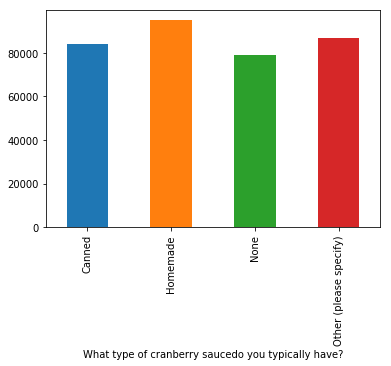

In [53]:
%matplotlib inline

sauce = grouped.agg(np.mean)
sauce["income"].plot(kind="bar")

### Aggregating with multiple columns

We can call groupby with multiple columns as input to get more granular groups. If we use the *What type of cranberry saucedo you typically have?* and *What is typically the main dish at your Thanksgiving dinner?* columns as input, we'll be able to find the average income of people who eat Homemade cranberry sauce and Tofurkey, for example:

In [54]:
grouped = data.groupby(["What type of cranberry saucedo you typically have?", "What is typically the main dish at your Thanksgiving dinner?"])
grouped.agg(np.mean)

RespondentID  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...                 
Canned                                             Chicken                                             4.336354e+09   
                                                   Ham/Pork                                            4.336757e+09   
                                                   I don't know                                        4.335987e+09   
                                                   Other (please specify)                              4.336682e+09   
                                                   Roast beef                                          4.336254e+09   
                                                   Tofurkey                                            4.337157e+09   
                                                   Turkey                                              4.336705e+09   
Homemade                                           Chicken                                             4.336540e+09   
                                                   Ham/Pork                                            4.337253e+09   
                                                   I don't know                                        4.336084e+09   
                                                   Other (please specify)                              4.336863e+09   
                                                   Roast beef                                          4.336174e+09   
                                                   Tofurkey                                            4.336790e+09   
                                                   Turducken                                           4.337475e+09   
                                                   Turkey                                              4.336791e+09   
None                                               Chicken                                             4.336151e+09   
                                                   Ham/Pork                                            4.336680e+09   
                                                   I don't know                                        4.336412e+09   
                                                   Other (please specify)                              4.336688e+09   
                                                   Roast beef                                          4.337424e+09   
                                                   Tofurkey                                            4.336950e+09   
                                                   Turducken                                           4.336739e+09   
                                                   Turkey                                              4.336784e+09   
Other (please specify)                             Ham/Pork                                            4.336465e+09   
                                                   Other (please specify)                              4.337335e+09   
                                                   Tofurkey                                            4.336122e+09   
                                                   Turkey                                              4.336724e+09   

                                                                                                         gender  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...             
Canned                                             Chicken                                             0.333333   
                                                   Ham/Pork                                            0.642857   
                                                   I don't know                                        0.000000   
                                                   Other (please specify)   

Above output gives us some interesting patterns:

* People who have Turducken and Homemade cranberry sauce seem to have high household incomes.
* People who eat Canned cranberry sauce tend to have lower incomes, but those who also have Roast Beef have the lowest incomes.
* It looks like there's one person who has Canned cranberry sauce and doesn't know what type of main dish he's having.


In [55]:
grouped["income"].agg([np.mean, np.sum, np.std]).head(10) # Aggregating with multiple functions

mean  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...                  
Canned                                             Chicken                                              80999.200000   
                                                   Ham/Pork                                             77499.071429   
                                                   I don't know                                          4999.000000   
                                                   Other (please specify)                               53213.285714   
                                                   Roast beef                                           25499.000000   
                                                   Tofurkey                                            100713.428571   
                                                   Turkey                                               85242.221945   
Homemade                                           Chicken                                              19999.000000   
                                                   Ham/Pork                                             96874.250000   
                                                   I don't know                                                  NaN   

                                                                                                              sum  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...               
Canned                                             Chicken                                               404996.0   
                                                   Ham/Pork                                             1084987.0   
                                                   I don't know                                            4999.0   
                                                   Other (please specify)                                372493.0   
                                                   Roast beef                                            127495.0   
                                                   Tofurkey                                              704994.0   
                                                   Turkey                                              34182131.0   
Homemade                                           Chicken                                                59997.0   
                                                   Ham/Pork                                              387497.0   
                                                   I don't know                                               0.0   

                                                                                                                std  
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...                
Canned                                             Chicken                                             75779.677356  
                                                   Ham/Pork                                            56645.147121  
                                                   I don't know                                                 NaN  
                                                   Other (please specify)                              29780.946290  
                                                   Roast beef                                          24584.039538  
                                                   Tofurkey                                            61351.619299  
                                                   Turkey                                              55687.518532  
Homemade                                           Chicken                                             16393.596311  
                                                   Ham/Pork                           

### Using apply on groups

One of the limitations of aggregation is that each function has to return a single number. While we can perform computations like finding the mean, we can't for example, call value_counts to get the exact count of a category. We can do this using the **pandas.GroupBy.apply** method. This method will apply a function to each group, then combine the results.

In the below code, we'll apply value_counts to find the number of people who live in each area type (Rural, Suburban, etc) who eat different kinds of main dishes for Thanksgiving:

In [56]:
grouped = data.groupby("How would you describe where you live?")["What is typically the main dish at your Thanksgiving dinner?"]
grouped.apply(lambda x:x.value_counts())

How would you describe where you live?                        
Rural                                   Turkey                    189
                                        Other (please specify)      9
                                        Ham/Pork                    7
                                        Tofurkey                    3
                                        I don't know                3
                                        Chicken                     2
                                        Turducken                   2
                                        Roast beef                  1
Suburban                                Turkey                    449
                                        Ham/Pork                   17
                                        Other (please specify)     13
                                        Tofurkey                    9
                                        Chicken                     3
                           

The above table shows us that people who live in different types of areas eat different Thanksgiving main dishes at about the same rate.

![Thank You](https://swizzlebooks.com/img/ocl/ty.png)